In [3]:
%matplotlib notebook
%pylab


Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


Time variant solution 

<IPython.core.display.Javascript object>


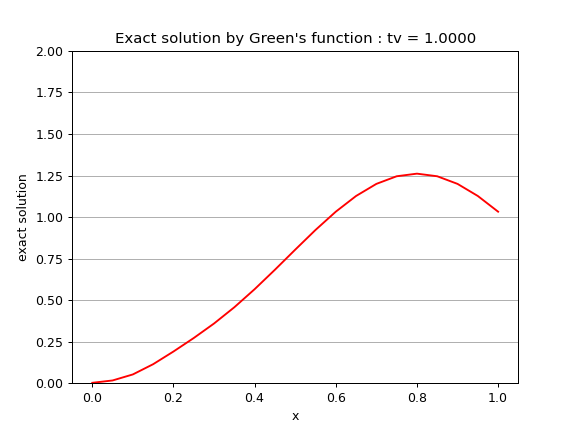

In [9]:
from scipy.special import erf
epsilon=0.05
def Heatkernel(x):
    return (1/sqrt(4*np.pi*epsilon)*exp(-x**2/(4*epsilon)))
def heaviside_heat(x):
    return 1/2 + 1/2*erf((x)/((4*epsilon)*(0.5)))   
c=1
a=0
b=1
M = 20
dx=(b-a)/M
# dx=0.01
t0=0
T=1
# M = 20
t= linspace(t0,T,M+1)
x=linspace(a,b,M+1)
def Gfunct(x,t,si,tau):
    return Heatkernel(x-si-c*(t-tau))*heaviside_heat(t-tau)
si = 0.3
tau=0.1
Qhat = zeros((len(t),len(x)))
for n in range(len(t)):
    for j in range(len(x)):
        Qhat[n,j] = Gfunct(t[n],x[j],si,tau)
fig = figure(1)
clf()
hdl, = plot(x,Qhat[0],'r')
tv = t[0]
tstr = 'Exact solution by Green\'s function : tv = {:.4f}'.format
htitle = title(tstr(0))
xlabel('x')
ylabel('exact solution')
htitle.set_text(tstr(tv))
grid(axis='y')
for m in range(len(t)):
    hdl.set_ydata(Qhat[m])
    ylim([0,2])
    tv = t[m]
    htitle.set_text(tstr(tv))
    fig.canvas.draw()   
    pause(0.2) 
show()

Solution to the advection equation

In [ ]:
def Hatfunct(x):
    H=np.where(abs(x)<=(epsilon/2),(2/epsilon)*(1-abs((2*x))/epsilon),0)
    return H

